# Wind prediction

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('./final.csv')

In [3]:
dataset.head(5)

,Date,Temp,Point de rosée,Hum. rel,Dir. du vent,Vit. du vent,Pression à la station
0,1/1/2017 0:00,"-7,3","-12,3",67.0,32.0,12.0,"98,12"
1,1/1/2017 1:00,"-7,5","-12,5",68.0,32.0,11.0,"98,14"
2,1/1/2017 2:00,"-9,5","-12,8",77.0,29.0,1.0,"98,16"
3,1/1/2017 3:00,"-11,7","-13,5",86.0,0.0,1.0,"98,17"
4,1/1/2017 4:00,"-12,8","-15,1",83.0,11.0,2.0,"98,18"


### Data preprocessing

In [4]:
dates = np.array(dataset.Date)
new_dates = []
for i in range(len(dates)):
    if '/' in dates[i]:
        [date,hour]=dates[i].split(' ')
        new_dates.append(date.split('/')+[hour.split(':')[0]])
preprocess_dates = pd.DataFrame(new_dates, columns=['Mois','Jour','An','Heure'])

In [5]:
cos_month = np.array(np.cos(pd.to_numeric(preprocess_dates.Mois).multiply((360/12)*(np.pi/180.0))))
sin_month = np.array(np.sin(pd.to_numeric(preprocess_dates.Mois).multiply((360/12)*(np.pi/180.0))))

In [6]:
cos_hour = np.array(np.cos(pd.to_numeric(preprocess_dates.Heure).multiply((360/24)*(np.pi/180.0))))
sin_hour = np.array(np.sin(pd.to_numeric(preprocess_dates.Heure).multiply((360/24)*(np.pi/180.0))))

In [7]:
dataset.columns

Index(['Date', 'Temp ', 'Point de rosée ', 'Hum. rel ', 'Dir. du vent ',
       'Vit. du vent', 'Pression à la station'],
      dtype='object')

In [8]:
cos_dir_wind = np.array(np.cos(pd.to_numeric(dataset["Dir. du vent"]).multiply(np.pi/18.0)))
sin_dir_wind = np.array(np.sin(pd.to_numeric(dataset["Dir. du vent"]).multiply(np.pi/18.0)))

In [9]:
dataset["cos_hour"] = cos_hour
dataset["sin_hour"] = sin_hour
dataset["cos_month"] = cos_month
dataset["sin_month"] = sin_month
dataset["cos_dir_wind"] = cos_dir_wind
dataset["sin_dir_wind"] = sin_dir_wind

In [10]:
dataset = dataset.drop(columns = ['Date',"Dir. du vent"])

In [11]:
dataset['Temp'] = pd.to_numeric(dataset['Temp'].str.replace(',','.'))
dataset['Point de rosée'] = pd.to_numeric(dataset['Point de rosée'].str.replace(',','.'))
dataset['Pression à la station'] = pd.to_numeric(dataset['Pression à la station'].str.replace(',','.'))
# dataset['Hum. rel '] = dataset['Hum. rel ']
# dataset['Dir. du vent '] = dataset['Dir. du vent ']
# dataset['Vit. du vent'] = dataset['Vit. du vent']
# dataset['Pression à la station'] = dataset['Dir. du vent ']

In [12]:
dataset.isnull().sum()

Temp                       53
Point de rosée             53
Hum. rel                   53
Vit. du vent               53
Pression à la station      53
cos_hour                    0
sin_hour                    0
cos_month                   0
sin_month                   0
cos_dir_wind             1213
sin_dir_wind             1213
dtype: int64

In [13]:
dataset = dataset.apply(pd.to_numeric)

In [14]:
dataset = dataset.dropna()

In [15]:
dataset.head()

,Temp,Point de rosée,Hum. rel,Vit. du vent,Pression à la station,cos_hour,sin_hour,cos_month,sin_month,cos_dir_wind,sin_dir_wind
0,-7.3,-12.3,67.0,12.0,98.12,1.000000,0.000000,0.866025,0.5,0.766044,-0.642788
1,-7.5,-12.5,68.0,11.0,98.14,0.965926,0.258819,0.866025,0.5,0.766044,-0.642788
2,-9.5,-12.8,77.0,1.0,98.16,0.866025,0.500000,0.866025,0.5,0.342020,-0.939693
3,-11.7,-13.5,86.0,1.0,98.17,0.707107,0.707107,0.866025,0.5,1.000000,0.000000
4,-12.8,-15.1,83.0,2.0,98.18,0.500000,0.866025,0.866025,0.5,-0.342020,0.939693


In [16]:
dataset.max()

Temp                      34.30
Point de rosée            17.40
Hum. rel                 100.00
Vit. du vent              33.00
Pression à la station    100.04
cos_hour                   1.00
sin_hour                   1.00
cos_month                  1.00
sin_month                  1.00
cos_dir_wind               1.00
sin_dir_wind               1.00
dtype: float64

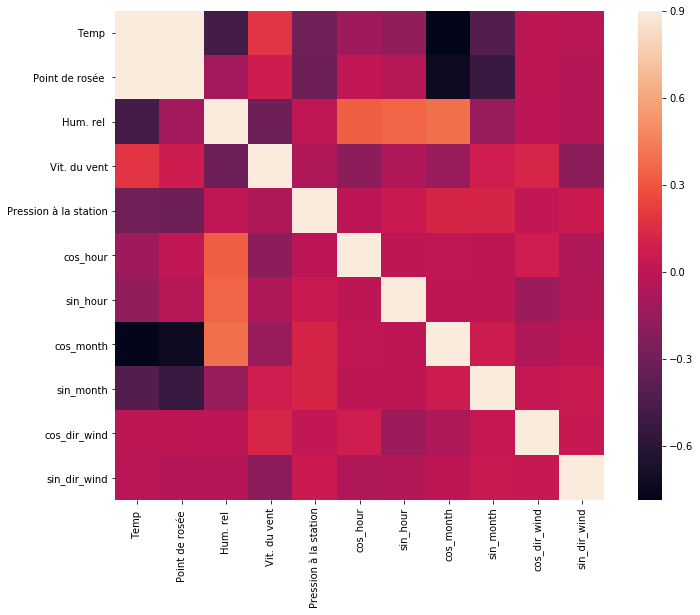

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
corrmat = dataset.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [19]:
dataset.head()

,Temp,Point de rosée,Hum. rel,Vit. du vent,Pression à la station,cos_hour,sin_hour,cos_month,sin_month,cos_dir_wind,sin_dir_wind
0,-7.3,-12.3,67.0,12.0,98.12,1.000000,0.000000,0.866025,0.5,0.766044,-0.642788
1,-7.5,-12.5,68.0,11.0,98.14,0.965926,0.258819,0.866025,0.5,0.766044,-0.642788
2,-9.5,-12.8,77.0,1.0,98.16,0.866025,0.500000,0.866025,0.5,0.342020,-0.939693
3,-11.7,-13.5,86.0,1.0,98.17,0.707107,0.707107,0.866025,0.5,1.000000,0.000000
4,-12.8,-15.1,83.0,2.0,98.18,0.500000,0.866025,0.866025,0.5,-0.342020,0.939693


In [20]:
from sklearn.preprocessing import StandardScaler

train_size = 18000
dataset = pd.DataFrame(dataset)
sc_X = StandardScaler()
sc_X.fit(dataset.iloc[:train_size])
dataset = sc_X.transform(dataset)
dataset = pd.DataFrame(dataset)
sc_y = StandardScaler()
sc_y.fit(dataset.iloc[:train_size,[3,-2,-1]])
dataset.iloc[:,[3,-2,-1]] = sc_y.transform(dataset.iloc[:,[3,-2,-1]])
dataset = pd.DataFrame(dataset)

In [21]:
past_timesteps = 5
futur_timesteps = 2

X = [np.array(dataset.iloc[index:index+past_timesteps,:]) for index in range(len(dataset)-past_timesteps-futur_timesteps)]
y = [np.array(dataset.iloc[index:index+futur_timesteps,[3,-2,-1]]) for index in range(past_timesteps,len(dataset)-futur_timesteps)]

In [22]:
X = np.array(X)
y = np.array(y)

In [23]:
X_train = X[:train_size,:,:]
X_test = X[train_size:,:,:]
y_train = y[:train_size,:,:]
y_test = y[train_size:,:,:]

In [24]:
input_size = len(dataset.columns)
output_size = 3
nb_epochs = 30
batch_size = 128
use_dropout = False
lstm_recurrent_dropout = 0
lstm_dropout = 0
fc_dropout = 0.2
hidden_size_lstm = 128*2
hidden_size_fc1 = 128

In [25]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Flatten, Reshape

# Create the network
model = Sequential()
model.add(LSTM(hidden_size_lstm, input_shape=(past_timesteps,input_size) , return_sequences=True, recurrent_dropout=lstm_recurrent_dropout, dropout=lstm_dropout))
#model.add(LSTM(hidden_size_lstm, return_sequences=True, recurrent_dropout=lstm_recurrent_dropout, dropout=lstm_dropout))
model.add(Flatten())
if use_dropout:model.add(Dropout(fc_dropout))
model.add(Dense(units = hidden_size_fc1, activation = 'relu'))
if use_dropout: model.add(Dropout(fc_dropout))
model.add(Dense(units = output_size*futur_timesteps, activation = 'linear'))
model.add(Reshape((futur_timesteps, output_size)))

# Compile the network
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train,y_train, epochs=nb_epochs, batch_size=batch_size)

C:\Users\Portable\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Epoch 1/30
18000/18000 [==============================] - 11s 629us/step - loss: 0.6014
Epoch 2/30
18000/18000 [==============================] - 10s 566us/step - loss: 0.5387
Epoch 3/30
18000/18000 [==============================] - 10s 543us/step - loss: 0.5305
Epoch 4/30
18000/18000 [==============================] - 9s 518us/step - loss: 0.5260
Epoch 5/30
18000/18000 [==============================] - 10s 560us/step - loss: 0.5218
Epoch 6/30
18000/18000 [==============================] - 10s 541us/step - loss: 0.5192
Epoch 7/30
18000/18000 [==============================] - 9s 522us/step - loss: 0.5165
Epoch 8/30
18000/18000 [==============================] - 10s 534us/step - loss: 0.5134
Epoch 9/30
18000/18000 [==============================] - 10s 556us/step - loss: 0.5102
Epoch 10/30
18000/18000 [==============================] - 10s 536us/step - loss: 0.5068
Epoch 11/30
18000/18000 [==============================] - 10s 553us/step - loss: 0.5041
Epoch 12/30
18000/18000 [=======

In [26]:
model.fit(X_train,y_train, epochs=nb_epochs, batch_size=batch_size)

Epoch 1/30
18000/18000 [==============================] - 10s 543us/step - loss: 0.3409
Epoch 2/30
18000/18000 [==============================] - 10s 553us/step - loss: 0.32510s - loss: 
Epoch 3/30
18000/18000 [==============================] - 10s 562us/step - loss: 0.3117
Epoch 4/30
18000/18000 [==============================] - 10s 577us/step - loss: 0.2968
Epoch 5/30
18000/18000 [==============================] - 11s 597us/step - loss: 0.2829
Epoch 6/30
18000/18000 [==============================] - 15s 818us/step - loss: 0.2677
Epoch 7/30
18000/18000 [==============================] - 15s 806us/step - loss: 0.2545
Epoch 8/30
18000/18000 [==============================] - 11s 593us/step - loss: 0.2419
Epoch 9/30
18000/18000 [==============================] - 10s 567us/step - loss: 0.2298
Epoch 10/30
18000/18000 [==============================] - 10s 561us/step - loss: 0.2185
Epoch 11/30
18000/18000 [==============================] - 10s 550us/step - loss: 0.2070
Epoch 12/30
18000/1

In [27]:
y_pred = model.predict(X_test)

In [28]:
y_pred

array([[[-0.40186697,  0.83860815,  0.5569824 ],
        [-0.27580076,  0.3268845 , -0.03767501]],

       [[-0.34449124,  0.79331434,  0.69119817],
        [-0.24226546,  0.7833007 ,  0.9666887 ]],

       [[-0.49013925, -0.03213722, -0.07929166],
        [-0.13855948, -0.1391916 ,  0.4626964 ]],

       ...,

       [[ 1.1498129 ,  0.40405637, -2.0379422 ],
        [ 0.5339718 , -0.06032705, -1.6221645 ]],

       [[-0.9859293 ,  0.31595874, -0.812878  ],
        [-1.1123451 ,  0.59344137, -1.6330836 ]],

       [[-1.5458913 ,  0.8185396 , -0.2865507 ],
        [-0.971401  ,  0.17931363, -1.421258  ]]], dtype=float32)

In [29]:
sc_y.inverse_transform(y_pred[0])

array([[-0.40186697,  0.83860815,  0.5569824 ],
       [-0.27580076,  0.3268845 , -0.03767501]], dtype=float32)

In [53]:
y_pred[:,0,-2]

array([ 1.3413361 ,  0.42042905, -0.4863414 , ...,  0.5572949 ,
        0.12687528,  0.11554288], dtype=float32)

In [41]:
y_test[0]

array([[-1.2061611 ,  1.19934341,  0.24188264],
       [-0.96886535, -0.92271212, -0.95093249]])

In [42]:
sc_y.inverse_transform(y_test[0])

array([[-1.2061611 ,  1.19934341,  0.24188264],
       [-0.96886535, -0.92271212, -0.95093249]])

In [ ]:
y_test

In [43]:
y_pred[:,0,0]

array([-0.6530783 , -1.1550515 , -0.88179564, ...,  0.44192737,
       -0.7033779 , -1.5567799 ], dtype=float32)

In [ ]:
y_pred[1]

In [48]:
diff = sc_y.inverse_transform(y_test[:,0,:])-sc_y.inverse_transform(y_pred[:,0,:])

In [49]:
np.mean(diff[:,0])

0.005420814075496175

In [74]:
sc_y.inverse_transform(y_test[:,0,:])[:,-1]

array([ 0.24188264, -0.95093249, -0.68596282, ...,  0.56411998,
        0.87656631,  1.84895811])

In [54]:
np.arccos(y_pred[:,0,-2])

C:\Users\Portable\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in arccos
  """Entry point for launching an IPython kernel.


array([      nan, 1.1368781, 2.078694 , ..., 0.979672 , 1.4435781,
       1.4549948], dtype=float32)

In [75]:
cos_first_hour = sc_y.inverse_transform(y_pred[:,0,:])[:,-2]
sin_first_hour = sc_y.inverse_transform(y_pred[:,0,:])[:,-1]
for i in range(len(cos_first_hour)):
    mul = 1 if sin_first_hour[i] >= 0 else -1
    cos_first_hour[i] = mul*np.arccos(max(min(1,cos_first_hour[i]),-1))

In [76]:
cos_first_hour*180/np.pi

array([  90.    ,    0.    , -180.    , ..., -168.4276,    0.    ,
       -180.    ], dtype=float32)

In [78]:
cos_test = sc_y.inverse_transform(y_test[:,0,:])[:,-2]
sin_test = sc_y.inverse_transform(y_test[:,0,:])[:,-1]
for i in range(len(cos_first_hour)):
    mul = 1 if sin_test[i] >= 0 else -1
    cos_test[i] = mul*np.arccos(max(min(1,cos_test[i]),-1))

In [80]:
cos_test*180/np.pi

array([   0., -180., -180., ...,   90.,   90.,   90.])

In [79]:
cos_test*180/np.pi-cos_first_hour*180/np.pi

array([ -90.        , -180.        ,    0.        , ...,  258.42759705,
         90.        ,  270.        ])